# VotingClassifier

1. In this case, voting ensemble technique will be enmploy instead of using actual voting classifier

Overview:
1. Import relevant libraries
2. Import all required models
3. Obtain accuracy of each model from 'Capstone Yoga Poses Classifier juypter notebook'
4. Conduct Hard voting and determine wrongly classified photos
5. Combine all misclassified photos into a Dataframe
6. Conduct Soft voting throught Weighted averages based on accuracy and determine wrongly classified photos
7. Plot out misclassified photos and their individual probability

In [1]:
import numpy as np
import cv2
import sys, os
from keras.models import load_model
from keras import optimizers
from keras.models import load_model
from sklearn.ensemble import VotingClassifier
from os import listdir
from os.path import isfile, join

Using TensorFlow backend.


In [2]:
import random

In [3]:
import pandas as pd
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline


#directories
import os
from os import listdir
from os.path import isfile, join

import itertools
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
from skimage import img_as_ubyte
\
import skimage.transform
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense , Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D ,Dropout
from keras.models import load_model
from sklearn.ensemble import VotingClassifier
# from keras.layers import 



/Users/YLChua/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Unfortunately due to large file size, IncepResNetV2_model is unable to load in juypter.
1. IncepResNetV2_model = load_model('./model files/IncepResNetV2_model.h5')

The below accuracy list is a representation of each individual model accuracy 
(Since IncepResNetV2 has difficulty loading, it will be excluded from this part of the analysis)
1. IncepResNetV2 92.78 %
2. InceptionV3 93.04 %
3. mobilenet 93.04 %
4. MobileNetV2 89.78 %
5. Xception 92.16 %

In [4]:
accuracy = [ 93.04, 93.04, 89.78, 92.16]

## load all pretrained models

In [5]:
InceptionV3_model  = load_model('./model files/InceptionV3_model.h5')

In [6]:
mobilenet_model     = load_model('./model files/mobilenet_model_1.h5')

In [7]:
MobileNetV2_model   = load_model('./model files/MobileNetV2_model.h5')

In [8]:
Xception_model      = load_model('./model files/Xception_model.h5')

In [9]:
models = [InceptionV3_model,mobilenet_model,MobileNetV2_model,Xception_model]

In [10]:
classes = ['ardhabaddhapadmottanasana','ekapadabakasana','natarajasana',
           'parivrttaardhachandrasana','parivrttasuryayantrasana','salambasirsasana',
           'svargadvijasana','tittibihasana','vrishchikasana','vyaghrasana']

In [11]:
drive_path = '/Users/YLChua/Desktop/Capstone/4. image classes/'
cat_1_folder  = drive_path + '500_ardhabaddhapadmottanasana/'
cat_2_folder  = drive_path + '500_ekapadabakasana/'
cat_3_folder  = drive_path + '500_natarajasana/'
cat_4_folder  = drive_path + '500_parivrttaardhachandrasana/'
cat_5_folder  = drive_path + '500_parivrttasuryayantrasana/'
cat_6_folder  = drive_path + '500_salambasirsasana/'
cat_7_folder  = drive_path + '500_svargadvijasana/'
cat_8_folder  = drive_path + '500_tittibihasana/'
cat_9_folder  = drive_path + '500_vrishchikasana/'
cat_10_folder = drive_path + '500_vyaghrasana/'

In [12]:
folders_path = [cat_1_folder,cat_2_folder,cat_3_folder, 
                cat_4_folder, cat_5_folder, cat_6_folder, 
                cat_7_folder, cat_8_folder, cat_9_folder, cat_10_folder ]

In [13]:
all_images =[]
for i,path in enumerate(folders_path):
    ls = []
    for f in listdir(path):
        if isfile(join(path, f)):
            if 'DS' not in f:
                if '._' not in f:
                    ls.append([path+f,f,classes[i]])
    # ls = [[path+f,f,classes[i]] for f in listdir(path) if isfile(join(path, f)) if ('DS' or '._' ) not in f ]
    print('{} ,numer of images for {} : {}'.format(i+1,classes[i],len(ls)))
    all_images.extend(ls)

1 ,numer of images for ardhabaddhapadmottanasana : 553
2 ,numer of images for ekapadabakasana : 560
3 ,numer of images for natarajasana : 568
4 ,numer of images for parivrttaardhachandrasana : 598
5 ,numer of images for parivrttasuryayantrasana : 549
6 ,numer of images for salambasirsasana : 579
7 ,numer of images for svargadvijasana : 573
8 ,numer of images for tittibihasana : 606
9 ,numer of images for vrishchikasana : 662
10 ,numer of images for vyaghrasana : 560


In [14]:
df =pd.DataFrame(all_images,columns=['image_path','image_name','category'])
print(df.shape)
df.head()

(5808, 3)


,image_path,image_name,category
0,/Users/YLChua/Desktop/Capstone/4. image classe...,ardhabaddhapadmottanasana_10.jpg,ardhabaddhapadmottanasana
1,/Users/YLChua/Desktop/Capstone/4. image classe...,ardhabaddhapadmottanasana_1001.jpg,ardhabaddhapadmottanasana
2,/Users/YLChua/Desktop/Capstone/4. image classe...,ardhabaddhapadmottanasana_1001_2.jpg,ardhabaddhapadmottanasana
3,/Users/YLChua/Desktop/Capstone/4. image classe...,ardhabaddhapadmottanasana_1004.jpg,ardhabaddhapadmottanasana
4,/Users/YLChua/Desktop/Capstone/4. image classe...,ardhabaddhapadmottanasana_1005.jpg,ardhabaddhapadmottanasana


In [15]:
from sklearn.model_selection import train_test_split
train, tempt = train_test_split(df, train_size=0.6, shuffle = True, stratify = df.category, random_state = 27)
valid, test  = train_test_split(tempt, test_size=0.5, shuffle = True, stratify = tempt.category, random_state = 27)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
size = (224,224)
batch_size = 16
epoch = 500

test_steps  = math.ceil(test.shape[0]/batch_size)
test_steps

73

In [17]:
dat_gen_args_test = dict(rescale=1./255)

In [18]:
test_generator = ImageDataGenerator(**dat_gen_args_test).flow_from_dataframe(
    dataframe     = test,
    directory     = None,
    x_col         = 'image_path',
    y_col         = 'category',
    target_size   = size,
    color_mode    = 'rgb',
    classes       = classes,
    class_mode    = "categorical",
    batch_size    = batch_size,
    shuffle       = False,
    seed          = 27,
    save_format   = 'jpg',
    interpolation = "bicubic", 
    validate_filenames = True)

Found 1162 validated image filenames belonging to 10 classes.


models = [InceptionV3_model,mobilenet_model,MobileNetV2_model,Xception_model]

In [19]:
test_generator.reset() #need to reset
y_true = test_generator.classes

In [20]:
test_generator.reset() #need to reset
InceptionV3_model_predictions = InceptionV3_model.predict_generator(test_generator,steps=test_steps,verbose=1)
InceptionV3_model_pred_label  = [np.argmax(image_class) for image_class in InceptionV3_model_predictions]

73/73 [==============================] - 135s 2s/step


In [21]:
test_generator.reset() #need to reset
mobilenet_model_predictions = mobilenet_model.predict_generator(test_generator,steps=test_steps,verbose=1)
mobilenet_model_pred_label=[np.argmax(image_class) for image_class in mobilenet_model_predictions]

73/73 [==============================] - 90s 1s/step


In [22]:
test_generator.reset() #need to reset
MobileNetV2_model_predictions = MobileNetV2_model.predict_generator(test_generator,steps=test_steps,verbose=1)
MobileNetV2_model_pred_label  = [np.argmax(image_class) for image_class in MobileNetV2_model_predictions]

73/73 [==============================] - 110s 2s/step


In [23]:
test_generator.reset() #need to reset
Xception_model_predictions = Xception_model.predict_generator(test_generator,steps=test_steps,verbose=1)
Xception_model_pred_label  = [np.argmax(image_class) for image_class in Xception_model_predictions]

73/73 [==============================] - 286s 4s/step


## Hard Voting

In [24]:
models_pred_labels = [InceptionV3_model_pred_label,mobilenet_model_pred_label,
                      MobileNetV2_model_pred_label,Xception_model_pred_label]

In [25]:
def most_frequent(List): 
    return max(set(List), key = List.count) 

In [26]:
Hard_voting = []
all_pred_labels=[]
for i in range(len(y_true)):
    pred_labels =[]
    for labels in models_pred_labels:
        pred_labels.append(labels[i])
    all_pred_labels.append(pred_labels)
    Hard_voting.append(most_frequent(pred_labels))


In [27]:
test.reset_index(drop = True, inplace=True)

In [28]:
testing_df = pd.DataFrame(y_true,columns=['y_true'])
testing_df['Hard_voting'] = Hard_voting
testing_df['result'] = ''
testing_df['predict_labels'] = all_pred_labels
for i, rows in enumerate(testing_df.result):
    if testing_df.loc[i,'y_true'] == testing_df.loc[i,'Hard_voting']:
        testing_df.loc[i,'result']= 1
    elif testing_df.loc[i,'y_true'] != testing_df.loc[i,'Hard_voting']:
        testing_df.loc[i,'result']= 0

test.reset_index(inplace = True,drop=True)
hard_voting_df = pd.concat([test,testing_df], axis = 1)

In [29]:
display(hard_voting_df[(hard_voting_df.result==0)]),print('number of wrongly classified images' ,hard_voting_df[(hard_voting_df.result==0)].shape[0])



,image_path,image_name,category,y_true,Hard_voting,result,predict_labels
54,/Users/YLChua/Desktop/Capstone/4. image classe...,parivrttasuryayantrasana_190.jpg,parivrttasuryayantrasana,4,8,0,"[5, 4, 8, 9]"
179,/Users/YLChua/Desktop/Capstone/4. image classe...,ekapadabakasana_815.jpg,ekapadabakasana,1,3,0,"[1, 3, 3, 3]"
274,/Users/YLChua/Desktop/Capstone/4. image classe...,tittibhasana_8.jpg,tittibihasana,7,3,0,"[7, 7, 3, 3]"
313,/Users/YLChua/Desktop/Capstone/4. image classe...,tittibhasana_597.jpg,tittibihasana,7,3,0,"[7, 7, 3, 3]"
324,/Users/YLChua/Desktop/Capstone/4. image classe...,natarajasana_182.jpg,natarajasana,2,9,0,"[2, 2, 9, 9]"
354,/Users/YLChua/Desktop/Capstone/4. image classe...,salambasirsasana_149_9.jpg,salambasirsasana,5,8,0,"[8, 5, 8, 5]"
396,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_287.jpg,vyaghrasana,9,3,0,"[1, 6, 3, 3]"
460,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_559.jpg,vyaghrasana,9,8,0,"[8, 6, 2, 9]"
497,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_633.jpg,vyaghrasana,9,7,0,"[9, 7, 7, 3]"
582,/Users/YLChua/Desktop/Capstone/4. image classe...,tittibhasana_602.jpg,tittibihasana,7,0,0,"[7, 7, 0, 0]"


number of wrongly classified images 15


(None, None)

In [30]:
print('Accuracy for Hard voting :',round((100 -(hard_voting_df[(hard_voting_df.result==0)].shape[0]/ hard_voting_df.shape[0])*100),2),'%')


Accuracy for Hard voting : 98.71 %


In [31]:
hard_voting_failed = hard_voting_df[(hard_voting_df.result==0)]
hard_voting_failed

,image_path,image_name,category,y_true,Hard_voting,result,predict_labels
54,/Users/YLChua/Desktop/Capstone/4. image classe...,parivrttasuryayantrasana_190.jpg,parivrttasuryayantrasana,4,8,0,"[5, 4, 8, 9]"
179,/Users/YLChua/Desktop/Capstone/4. image classe...,ekapadabakasana_815.jpg,ekapadabakasana,1,3,0,"[1, 3, 3, 3]"
274,/Users/YLChua/Desktop/Capstone/4. image classe...,tittibhasana_8.jpg,tittibihasana,7,3,0,"[7, 7, 3, 3]"
313,/Users/YLChua/Desktop/Capstone/4. image classe...,tittibhasana_597.jpg,tittibihasana,7,3,0,"[7, 7, 3, 3]"
324,/Users/YLChua/Desktop/Capstone/4. image classe...,natarajasana_182.jpg,natarajasana,2,9,0,"[2, 2, 9, 9]"
354,/Users/YLChua/Desktop/Capstone/4. image classe...,salambasirsasana_149_9.jpg,salambasirsasana,5,8,0,"[8, 5, 8, 5]"
396,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_287.jpg,vyaghrasana,9,3,0,"[1, 6, 3, 3]"
460,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_559.jpg,vyaghrasana,9,8,0,"[8, 6, 2, 9]"
497,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_633.jpg,vyaghrasana,9,7,0,"[9, 7, 7, 3]"
582,/Users/YLChua/Desktop/Capstone/4. image classe...,tittibhasana_602.jpg,tittibihasana,7,0,0,"[7, 7, 0, 0]"


In [187]:
# save Dataframe to csv
hard_voting_failed.to_csv('./csv files/hard_voting_failed.csv')

Plot respective mis-labelled pictures

hard_voting_df = combine_test[(test.result == 0)]
hard_voting_df.sort_values(by='y_true', inplace = True)
hard_voting_df

## Weighted Average using modeling accuracy 'SOFT'

Accuracy is determine previously by the "result" in respective models dataframe

In [32]:
models_predictions = [InceptionV3_model_predictions,mobilenet_model_predictions,
                      MobileNetV2_model_predictions,Xception_model_predictions]

In [33]:
soft_voting = []
for j in range(len(y_true)):
    predict_proba =[]
    
    for i in range(len(classes)):
        prob_sum = 0
        for x, model in enumerate(models_predictions):
            prob_sum += model[j][i] * accuracy[x]/100
            
        predict_proba.append(prob_sum/len(models_predictions))

    soft_voting.append(np.argmax(predict_proba))

In [34]:
testing_df = pd.DataFrame(y_true,columns=['y_true'])
testing_df['soft_voting'] = soft_voting
testing_df['result'] = ''

for i, rows in enumerate(testing_df.result):
    if testing_df.loc[i,'y_true'] == testing_df.loc[i,'soft_voting']:
        testing_df.loc[i,'result']= 1
    elif testing_df.loc[i,'y_true'] != testing_df.loc[i,'soft_voting']:
        testing_df.loc[i,'result']= 0

test.reset_index(inplace = True,drop=True)
soft_voting_df = pd.concat([test,testing_df], axis = 1)

In [35]:
display(soft_voting_df[(soft_voting_df.result==0)]),print('Number of wrongly classified images' ,soft_voting_df[(soft_voting_df.result==0)].shape[0])

,image_path,image_name,category,y_true,soft_voting,result
54,/Users/YLChua/Desktop/Capstone/4. image classe...,parivrttasuryayantrasana_190.jpg,parivrttasuryayantrasana,4,8,0
179,/Users/YLChua/Desktop/Capstone/4. image classe...,ekapadabakasana_815.jpg,ekapadabakasana,1,3,0
258,/Users/YLChua/Desktop/Capstone/4. image classe...,ekapadabakasana_443.jpg,ekapadabakasana,1,7,0
396,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_287.jpg,vyaghrasana,9,3,0
460,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_559.jpg,vyaghrasana,9,8,0
497,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_633.jpg,vyaghrasana,9,7,0
505,/Users/YLChua/Desktop/Capstone/4. image classe...,ekapadabakasana_1328.jpg,ekapadabakasana,1,7,0
649,/Users/YLChua/Desktop/Capstone/4. image classe...,vrishchikasana_137.jpg,vrishchikasana,8,7,0
654,/Users/YLChua/Desktop/Capstone/4. image classe...,svargadvijasana_882.jpg,svargadvijasana,6,7,0
880,/Users/YLChua/Desktop/Capstone/4. image classe...,natarajasana_143.jpg,natarajasana,2,5,0


Number of wrongly classified images 11


(None, None)

In [36]:
print('Accuracy for Soft voting :',round((100 -(soft_voting_df[(soft_voting_df.result==0)].shape[0]/ soft_voting_df.shape[0])*100),2),'%')


Accuracy for Soft voting : 99.05 %


In [37]:
#save dataframe to csv
soft_voting_df.to_csv('soft_voting_df.csv')

### Examining the misclassified photos for each individual category

In [38]:
problems=soft_voting_df[(soft_voting_df.result==0)].index.tolist()

In [39]:
misclassified_predict_proba =[]
for j in range(len(y_true)):
    predict_proba =[]
    if j in problems:
        for i in range(len(classes)):
            prob_sum = 0
            for x, model in enumerate(models_predictions):
                prob_sum += model[j][i] * accuracy[x]/100

            predict_proba.append(prob_sum/len(models_predictions))
        probability = round((predict_proba[np.argmax(predict_proba)])*100,2)    
        print(j,np.argmax(predict_proba),probability ,'%')
        misclassified_predict_proba.append(predict_proba)     


54 8 28.52 %
179 3 36.26 %
258 7 43.23 %
396 3 31.47 %
460 8 24.06 %
497 7 46.14 %
505 7 45.67 %
649 7 39.82 %
654 7 85.14 %
880 5 67.1 %
1072 5 47.11 %


Most probability for wrongly classified are below 50%

In [40]:
soft_voting_failed = soft_voting_df[(soft_voting_df.result==0)]
soft_voting_failed['predict_proba'] = misclassified_predict_proba
soft_voting_failed

/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,image_path,image_name,category,y_true,soft_voting,result,predict_proba
54,/Users/YLChua/Desktop/Capstone/4. image classe...,parivrttasuryayantrasana_190.jpg,parivrttasuryayantrasana,4,8,0,"[0.012148591308052601, 0.0016248602724137156, ..."
179,/Users/YLChua/Desktop/Capstone/4. image classe...,ekapadabakasana_815.jpg,ekapadabakasana,1,3,0,"[0.004101598562445543, 0.24551726071685553, 0...."
258,/Users/YLChua/Desktop/Capstone/4. image classe...,ekapadabakasana_443.jpg,ekapadabakasana,1,7,0,"[0.0016641759763617301, 0.40071870532899634, 0..."
396,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_287.jpg,vyaghrasana,9,3,0,"[0.014073913402898324, 0.1619087296448648, 0.0..."
460,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_559.jpg,vyaghrasana,9,8,0,"[0.0359646935871453, 0.003901636990404222, 0.1..."
497,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_633.jpg,vyaghrasana,9,7,0,"[0.0008429483975116454, 0.00027344504405639897..."
505,/Users/YLChua/Desktop/Capstone/4. image classe...,ekapadabakasana_1328.jpg,ekapadabakasana,1,7,0,"[0.00016458805085276253, 0.4133543928592095, 3..."
649,/Users/YLChua/Desktop/Capstone/4. image classe...,vrishchikasana_137.jpg,vrishchikasana,8,7,0,"[0.20019027351306903, 0.008600688378729137, 0...."
654,/Users/YLChua/Desktop/Capstone/4. image classe...,svargadvijasana_882.jpg,svargadvijasana,6,7,0,"[0.0015130724771821407, 0.0005040132691821782,..."
880,/Users/YLChua/Desktop/Capstone/4. image classe...,natarajasana_143.jpg,natarajasana,2,5,0,"[0.002218324916642814, 0.002182243859535083, 0..."


### Examining the misclassified photos for each individual category

In [41]:
problems=soft_voting_df[(soft_voting_df.result==0)].index.tolist()

In [42]:
misclassified_predict_proba =[]
for j in range(len(y_true)):
    predict_proba =[]
    if j in problems:
        for i in range(len(classes)):
            prob_sum = 0
            for x, model in enumerate(models_predictions):
                prob_sum += model[j][i] * accuracy[x]/100

            predict_proba.append(prob_sum/len(models_predictions))
        probability = round((predict_proba[np.argmax(predict_proba)])*100,2)    
        print(j,np.argmax(predict_proba),probability ,'%')
        misclassified_predict_proba.append(predict_proba)     


54 8 28.52 %
179 3 36.26 %
258 7 43.23 %
396 3 31.47 %
460 8 24.06 %
497 7 46.14 %
505 7 45.67 %
649 7 39.82 %
654 7 85.14 %
880 5 67.1 %
1072 5 47.11 %


Most probability for wrongly classified are below 50%

Randomly checking 10 samples to check probability of successfuly classified photos

In [55]:
soft_voting_success = soft_voting_df[(soft_voting_df.result == 1)][:10]

In [58]:
correct=soft_voting_success.index.tolist()

In [68]:
correctly_predicted_proba =[]
for j in range(len(y_true)):
    predict_proba =[]
    
    if j in correct:
        for i in range(len(classes)):
            prob_sum = 0
            for x, model in enumerate(models_predictions):
                prob_sum += model[j][i] * accuracy[x]/100
            predict_proba.append(prob_sum/len(models_predictions))
        probability = round((predict_proba[np.argmax(predict_proba)])*100,2)    
        print(j,np.argmax(predict_proba),probability ,'%')
        correctly_predicted_proba.append(predict_proba)

0 4 92.0 %
1 4 44.31 %
2 6 92.0 %
3 6 92.0 %
4 7 88.34 %
5 9 91.77 %
6 5 88.39 %
7 6 91.66 %
8 0 91.05 %
9 4 92.0 %


In [76]:
soft_voting_success['predict_proba'] = correctly_predicted_proba
soft_voting_success

,image_path,image_name,category,y_true,soft_voting,result,predict_proba
0,/Users/YLChua/Desktop/Capstone/4. image classe...,parivrttasuryayantrasana_506.jpg,parivrttasuryayantrasana,4,4,1,"[1.2818070242568597e-07, 3.018301564488506e-13..."
1,/Users/YLChua/Desktop/Capstone/4. image classe...,parivrttasuryayantrasana_54.jpg,parivrttasuryayantrasana,4,4,1,"[0.004506208259401319, 0.0017905357807718246, ..."
2,/Users/YLChua/Desktop/Capstone/4. image classe...,svargadvijasana_226.jpg,svargadvijasana,6,6,1,"[1.6735484916832616e-06, 1.720814326350961e-06..."
3,/Users/YLChua/Desktop/Capstone/4. image classe...,svargadvijasana_155.jpg,svargadvijasana,6,6,1,"[1.294996754832974e-07, 1.1267627245026279e-07..."
4,/Users/YLChua/Desktop/Capstone/4. image classe...,tittibhasana_450.jpg,tittibihasana,7,7,1,"[0.004928377183853338, 0.0007770024695874312, ..."
5,/Users/YLChua/Desktop/Capstone/4. image classe...,vyaghrasana_241_2.jpg,vyaghrasana,9,9,1,"[4.6798330491514685e-06, 5.625250944489513e-08..."
6,/Users/YLChua/Desktop/Capstone/4. image classe...,salambasirsasana_36.jpg,salambasirsasana,5,5,1,"[3.320536538464563e-05, 4.151249970494533e-05,..."
7,/Users/YLChua/Desktop/Capstone/4. image classe...,svargadvijasana_55.jpg,svargadvijasana,6,6,1,"[0.000236694743917211, 0.0005592348353943635, ..."
8,/Users/YLChua/Desktop/Capstone/4. image classe...,ardhabaddhapadmottanasana_1069.jpg,ardhabaddhapadmottanasana,0,0,1,"[0.9105430499970912, 7.91800608427753e-06, 0.0..."
9,/Users/YLChua/Desktop/Capstone/4. image classe...,parivrttasuryayantrasana_393.jpg,parivrttasuryayantrasana,4,4,1,"[4.74240620945281e-06, 1.1748994293555376e-10,..."


In [77]:
soft_voting_success.to_csv('soft_voting_success.csv')

In [78]:
soft_voting_success = pd.read_csv('soft_voting_success.csv')
soft_voting_success.predict_proba[:1]

0    [1.2818070242568597e-07, 3.018301564488506e-13...
Name: predict_proba, dtype: object

In [79]:
def plot_soft_voting(ls,df):
    for index in ls:
        print('*******************************************')
        print('True label :', classes[int(df.loc[index,'y_true'])], '\nClass      : ' + str(df.loc[index,'y_true']))
        print('-------------------------------------------')
        #import image
        path = df.loc[index,'image_path']
        img = cv2.imread(path)
        
        #plot picture and information
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        true_label = classes[df.loc[index,'y_true']]
        display_text_image = 'Predicted as \n :' + classes[int(df.loc[index,'soft_voting'])]
        plt.title(display_text_image,color ='red')
        plt.axis('off')
#         ax.set_title('Normalized occupied \n Neighbors')
#         plot probability 
        plt.subplot(1,2,2)
        ls = df.loc[index,'predict_proba'].strip('[]').split(',')
        ls_input = [ float(item.strip(' ')) for item in ls]
        
        
        thisplot = plt.bar(range(len(classes)),ls_input, color='blue')
        thisplot[df.loc[index,'soft_voting']].set_color('r')
        display_title_prob = 'Predicted as \n Class :' + str(df.loc[index,'soft_voting'])
        plt.title(display_title_prob,color ='green')
        plt.ylim([0,1])
        plt.xticks([i for i in range(10)])
        display_text_prob = 'Probability  Predicted :'+ str(round(ls_input[df.loc[index,'soft_voting']],2))
        plt.xlabel(display_text_prob,color ='green')
        
        plt.show()

*******************************************
True label : parivrttasuryayantrasana 
Class      : 4
-------------------------------------------


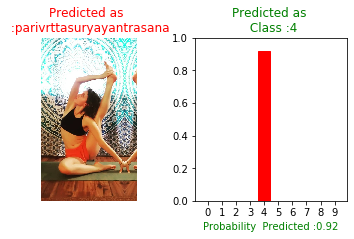

*******************************************
True label : parivrttasuryayantrasana 
Class      : 4
-------------------------------------------


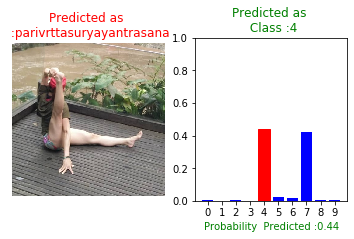

*******************************************
True label : svargadvijasana 
Class      : 6
-------------------------------------------


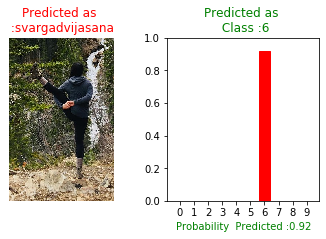

*******************************************
True label : svargadvijasana 
Class      : 6
-------------------------------------------


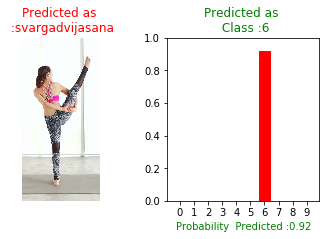

*******************************************
True label : tittibihasana 
Class      : 7
-------------------------------------------


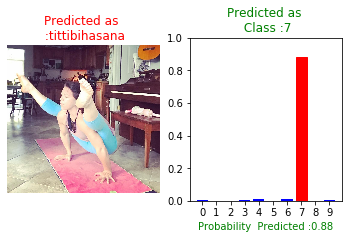

*******************************************
True label : vyaghrasana 
Class      : 9
-------------------------------------------


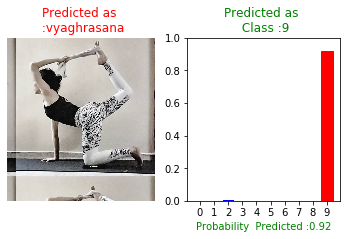

*******************************************
True label : salambasirsasana 
Class      : 5
-------------------------------------------


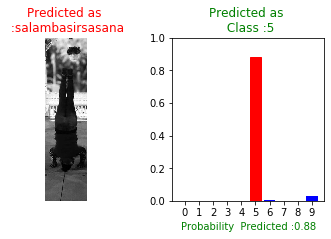

*******************************************
True label : svargadvijasana 
Class      : 6
-------------------------------------------


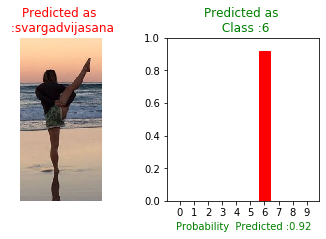

*******************************************
True label : ardhabaddhapadmottanasana 
Class      : 0
-------------------------------------------


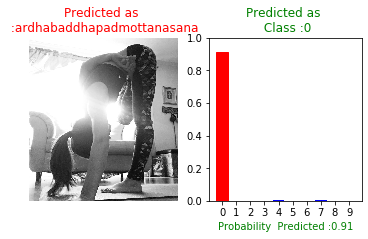

*******************************************
True label : parivrttasuryayantrasana 
Class      : 4
-------------------------------------------


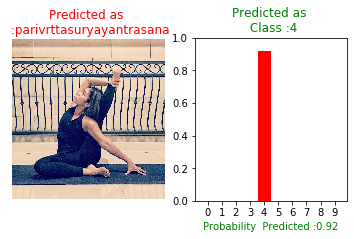

In [80]:
plot_soft_voting(correct,soft_voting_success)

A majority of prediction is approximately above 90%